# Rapport de Projet 2 : Estimateur par projection
# Etudiants
##  Dargel Florian 
## Wajih Benrissoul 

In [1]:
# Les packages nécessaires pour le projet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Question 1 

## Remarque : 
On a décidé d'implémenter la fonction à estimer de façon à ce qu'elle peut prendre un vecteur comme paramètre. Ceci permettra d'éviter de créer des boucles et donc de gagner en vitesse lors des calculs.

In [2]:
def fonction(x):
    return ((x**2)*(2**(x-1)) - (x-0.5)**3)*np.sin(10*x)

In [3]:
def echantillons():
    n = 100
    sigma = 0.2
    output = []
    Xi = np.random.uniform(high=1,low=0,size = n)    
    ksi = np.random.normal(loc=0,scale=1,size=n)
    Yi = fonction(Xi) + sigma * ksi
    output = [Xi,Yi]
    return output

# Question 2

In [4]:
TT = np.linspace(start=0,stop=1,num=100)
YY = fonction(TT)

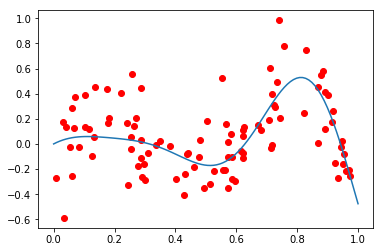

In [5]:
maliste = echantillons()
plt.plot(maliste[0],maliste[1],'ro')
plt.plot(TT,YY)

## Question 3.a : les cinq premiers vecteurs de la base de Fourier

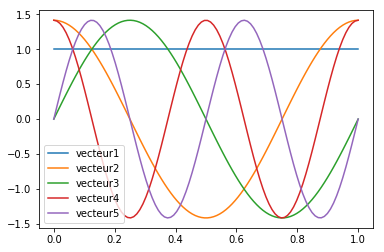

In [6]:
n = 100
TT = np.linspace(0,1,n)
#premier vecteur
YY1 = np.ones(n)
YY2 = (2**0.5)*np.cos(2*(np.pi)*TT)
YY3 = (2**0.5)*np.sin(2*(np.pi)*TT)
YY4 = (2**0.5)*np.cos(4*(np.pi)*TT)
YY5 = (2**0.5)*np.sin(4*(np.pi)*TT)
plt.plot(TT,YY1,label='vecteur1')
plt.plot(TT,YY2,label='vecteur2')
plt.plot(TT,YY3,label='vecteur3')
plt.plot(TT,YY4,label='vecteur4')
plt.plot(TT,YY5,label='vecteur5')
plt.legend(loc='best')

# Question 3.b : construire l'estimateur par projection de f pour différentes valeurs de N
Afin de construire les estimateurs on va créer d'abord des fonctions intermédiaires 

In [7]:
def phi_j_x(j,x) :
    # calcule la valeur de phi_j(x) où phi_j est le jème vecteur de la base de Fourier
    # x peut etre un vecteur avec cette implementation pour éviter les boucles et accélérer les calculs
    if j == 1 :
        return np.ones(x.shape)
    elif j%2 == 0 :
        return (2**0.5)*np.cos((np.pi)*j*x)
    elif j%2 == 1:
        return (2**0.5)*np.sin((np.pi)*(j-1)*x)

In [10]:
def theta_j(j,Xi,Yi) : 
    output = 0
    n = len(Xi)
    output = np.sum(Yi*phi_j_x(j,Xi))
    return output/n

In [11]:
def f_chapeau (Nproject,x,Xi,Yi) :
    # calcule l'estimateur d'ordre Nproject aux points x avec les observations (Xi,Yi)
    # x peut etre un vecteur avec cette implementation
    output = np.zeros(x.shape)
    for j in range(1,Nproject+1) :
        output = output + theta_j(j,Xi,Yi)*phi_j_x(j,x)
    return output

In [12]:
TT = np.linspace(start=0,stop=1,num=100)
FF = fonction(TT)
Valeurs = np.zeros((100,7))
indice = 0
Xi = maliste[0]
Yi = maliste[1]
for N in [5,10,15,20,30,50,70]:
    Valeurs[:,indice] = f_chapeau (N,TT,Xi,Yi)
    indice = indice + 1


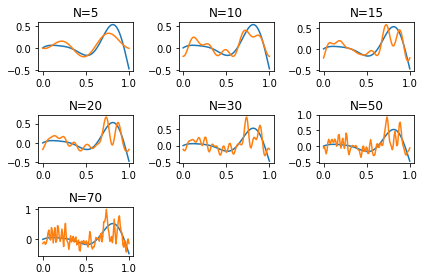

In [15]:
plt.subplot(3,3,1)
plt.plot(TT,FF,label='fonction')
plt.plot(TT,Valeurs[:,0])
plt.title('N=5')
plt.subplot(3,3,2)
plt.plot(TT,FF,label='fonction')
plt.plot(TT,Valeurs[:,1])
plt.title('N=10')
plt.subplot(3,3,3)
plt.plot(TT,FF,label='fonction')
plt.plot(TT,Valeurs[:,2])
plt.title('N=15')
plt.subplot(3,3,4)
plt.plot(TT,FF,label='fonction')
plt.plot(TT,Valeurs[:,3])
plt.title('N=20')
plt.subplot(3,3,5)
plt.plot(TT,FF,label='fonction')
plt.plot(TT,Valeurs[:,4])
plt.title('N=30')
plt.subplot(3,3,6)
plt.plot(TT,FF,label='fonction')
plt.plot(TT,Valeurs[:,5])
plt.title('N=50')
plt.subplot(3,3,7)
plt.plot(TT,FF,label='fonction')
plt.plot(TT,Valeurs[:,6])
plt.title('N=70')
plt.tight_layout()

# 3.c Méthode de validation croisée

In [16]:
# on mélange et on sépare le jeu de données en 10 parties chacune contenant 10 échantillons
N = 10
jeuDonnees = (np.array([Xi,Yi])).T # de la forme (Xi,Yi) où Xi et Yi sont des vecteurs colonnes
np.random.shuffle(jeuDonnees) # melange les lignes
listeValidation = np.split(jeuDonnees,N) # renvoie une liste de matrices

In [18]:
def mergingTrain(listeValidation,nbrEviter):
    # fusionne les membres de la listeValidation dont l'indice est différent de nbrEviter
    N = len(listeValidation)
    if nbrEviter != 0 :
        ret = listeValidation[0]
        for i in range(1,N):
            if i != nbrEviter :
                ret = np.concatenate((ret,listeValidation[i]))
    else : # nbrEviter = 0 dans ce cas
        ret = listeValidation[1]
        for i in range(2,N) :
            ret = np.concatenate((ret,listeValidation[i]))
    return ret
    

In [19]:
def ErreurValidationCroisee(listeValidation,Nprojection):
    # calcule l'erreur de validation croisée pour projecteur d'ordre Nprojection donné
    N = len(listeValidation)
    erreur = 0
    for nbrEviter in range(N):
        ret = mergingTrain(listeValidation,nbrEviter) # l'échantillon utile à l'estimateur
        XiLocal = ret[:,0]
        YiLocal = ret[:,1]
        Xtest = listeValidation[nbrEviter][:,0] # l'échantillon sur lequel on va calculer l'erreur
        Ytest = listeValidation[nbrEviter][:,1]
        Prediction = f_chapeau(Nprojection,Xtest,XiLocal,YiLocal)
        n = len(Xtest)
        # on ajoute les erreurs pour chaque échantillon
        erreur = erreur + (np.linalg.norm(Ytest-Prediction))/n
    return erreur

In [20]:
def MeilleureProjection(listeValidation,listeProjection):
    # renvoie le meilleur paramètre de troncature dans listeProjection
    # listeValidation est la liste des échantillons
    Erreur = np.zeros((len(listeProjection)))
    indice = 0
    for Nprojection in listeProjection :
        Erreur[indice] = ErreurValidationCroisee(listeValidation,Nprojection)
        indice = indice + 1
    return listeProjection[Erreur.argmin()]

In [23]:
# d'après les figures de la figure 3.b l'estimateur commence à faire du sur apprentissage
# pour les valeurs au delà de 20. On se restreint ainsi à l'intervalle entier [1,20]
# pour chercher le meilleur paramètre de troncature
listeProjection = list(range(1,21))
Nprojection = MeilleureProjection(listeValidation, listeProjection)
print(Nprojection)

7


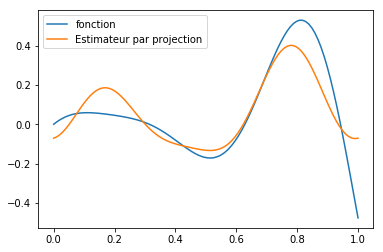

In [24]:
TT = np.linspace(start=0,stop=1,num=100)
FF = fonction(TT)
PP = f_chapeau (Nprojection,TT,Xi,Yi)
plt.plot(TT,FF,label = "fonction")
plt.plot(TT,PP, label = "Estimateur par projection")
plt.legend(loc='best')

# Question 4 Histogramme des valeurs optimales

(array([ 0.,  0.,  0., 37.,  8., 30., 41., 28., 19.,  8.,  9.,  4.,  9.,
         1.,  1.,  2.,  0.,  2.,  0.,  0.,  1.,  0.,  0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 23 Patch objects>)

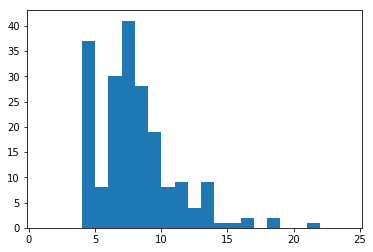

In [25]:
Nhist = 200
histo = np.zeros(Nhist)
for i in range(Nhist) : 
    maliste = echantillons() # pour prendre un nouvel échantillon
    Xi = maliste[0]
    Yi = maliste[1]
    N = 10
    jeuDonnees = (np.array([Xi,Yi])).T # de la forme (Xi,Yi) où Xi et Yi sont des vecteurs colonnes
    np.random.shuffle(jeuDonnees)
    listeValidation = np.split(jeuDonnees,N)
    listeProjection = list(range(1,25))
    histo[i] = MeilleureProjection(listeValidation, listeProjection)

plt.hist(histo,bins = list(range(1,25)))

In [26]:
print(np.mean(histo))
print(np.std(histo))

7.56
2.9910533261712335


# Question 5 :
Pour l'histogramme, On trouve des valeurs de N concentrés autour de 8 et avec un écart type de 3 environ. Cet écart est relativement important et ceci est dû au fait que l'entraînement se fasse pour un petit échantillon bruité.

# Exercice 2 : Données réelles

On va appliquer la méthode précedente à un jeu de données de nombre de passagers aériens par mois.
Le nombre de passagers est en constante évolution mais connaît toutefois une saisonnalité liée à la périodicité de haute/basse saison.
Ce jeu est adapté à l'estimateur par projection sur la base de Fourier qui est aussi périodique.
Le jeu initial est formé de deux colones : le mois et le nombre de passager. On a accordé au ième mois la valeur i avant de normaliser ce champs sur [0,1].

In [49]:
df = pd.read_csv('Projet2_international-airline-passengers.csv')
donnes = df.values
X = donnes[:,1]
Y = donnes[:,2]

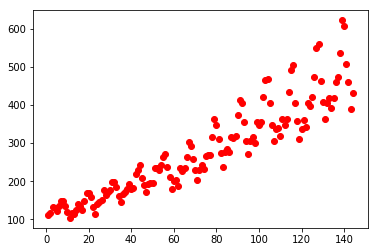

In [50]:
plt.plot(X,Y,'ro')

In [51]:
# normalisation de X
X = (X - X.min())/(X.max()-X.min())

In [52]:
X = X.astype(float)
Y = Y.astype(float)

In [53]:
# mélanger et répartir les données
# constitué de 144 échantillons, on a choisi de répartir le jeu en 12 blocs
#chacun contenant 12 échantillons
Nreel = 12 
jeuDonneesReel = (np.array([X,Y])).T # de la forme (X,Y) où X et Y sont des vecteurs colonnes
np.random.shuffle(jeuDonneesReel) # melanger les lignes
listeValidationReel = np.split(jeuDonneesReel,Nreel) # renvoie une liste de matrices

In [54]:
listeProjectionReel = list(range(1,50))
NprojectionReel = MeilleureProjection(listeValidationReel, listeProjectionReel)
print(NprojectionReel) # on trouve un nombre proche de 25

25


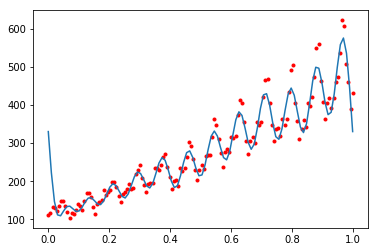

In [55]:

TT = np.linspace(start=0,stop=1,num=100)
PP = f_chapeau(NprojectionReel,TT,X,Y)
plt.plot(X,Y,'ro',markersize = 3)
plt.plot(TT,PP)
# Comme on peut le voir dans la figure la méthodologie est bien adaptée à ce jeu de données.